# Logistic regression

This Jupyter notebook details the steps of binary logistic regression classifier.<br> 
The notebook was implemented by <i>Nada Chaari</i>, PhD student at Istanbul Technical University (ITU). <br>

# <font color='darkblue'> Table of Contents </font>
### <font color='darkblue'>1 -  Logistic regression vs linear regression  </font>
### <font color='darkblue'>2 -  Data analysis and visualization </font>
### <font color='darkblue'>3 - Model evaluation </font>
#### <font color='darkblue'>3.1 Visualize CFM (confusion matrix) using a heatmap </font>
#### <font color='darkblue'>3.2 CFM evaluation metrics : Accuracy and Precision </font>
#####  <font color='darkblue'>3.3 AUROC (Area Under the Receiver Operating Characteristics)

## 1 -  Logistic regression vs Linear regression
**Example:** We want to predict whether or not a customer will complain given the number of minutes that our employee is late. 

<img src='https://raw.githubusercontent.com/BlohmLab/MLtutorials/master/img/w3_minutes_late.png' width='500'  align="center">

This is known as **binary classification**, because there are only two different classes: $y = 1$ (complained) and $y=0$ (did not complain).

<img src='https://raw.githubusercontent.com/BlohmLab/MLtutorials/master/img/w3_minutes_late_linear.png' width='500'  align="center">

<font size="4"> <center><b> **Linear model** $\hat{y} = w^Tx$</b></center> </font> 

* <font size="4"> <font color='green'> __Linear Regression__ </font> is used to determine the value of a continuous dependent variable. <font color='goldenrod'> __Logistic Regression__ </font> is generally used for classification purposes. </font> 
    

* <font size="4"> Unlike Linear Regression, __the dependent variable__ can take a limited number of values i.e, the dependent variable is __categorical__. When the number of possible outcomes is only __two__ it is called __Binary Logistic Regression__.</font> 

   
* <font size="4"> In Linear Regression, the output is the weighted sum of inputs. Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can <font color='red'> map any real value between 0 and 1</font> .</font> 


* <font size="4"> That’s why Logistic Regression can be used for <font color='red'> classification tasks </font> . </font> 

![](https://miro.medium.com/max/546/1*8q9ztX9dGVCv7e0DmH_IVA.png)

* <font size="4"> We can see from the above figure that the output of the linear regression is passed through an activation function that can map any real value between 0 and 1. </font>


* <font size="4"> The activation function that is used is known as the <font color='royalblue'> __sigmoid function__. </font> The plot of the sigmoid function looks like  </font>

![](https://miro.medium.com/max/495/1*yKvimZ3MCAX-rwMX2n87nw.png)

 <font size="4"> <center><b> **sigmoid function**  $\sigma(x) = \frac{1}{1 + \textrm{exp}(-x)}$ </b></center> </font> 

* <font size="4"> We can see that the value of the sigmoid function always lies between 0 and 1. The value is exactly 0.5 at X=0. We can use 0.5 as the probability threshold to determine the classes. If the probability is greater than 0.5, we classify it as __Class 1(Y=1)__ or else as __Class 0(Y=0)__.  </font>

<img src='https://raw.githubusercontent.com/BlohmLab/MLtutorials/master/img/w3_minutes_late_logistic.png' width='500'  align="center">

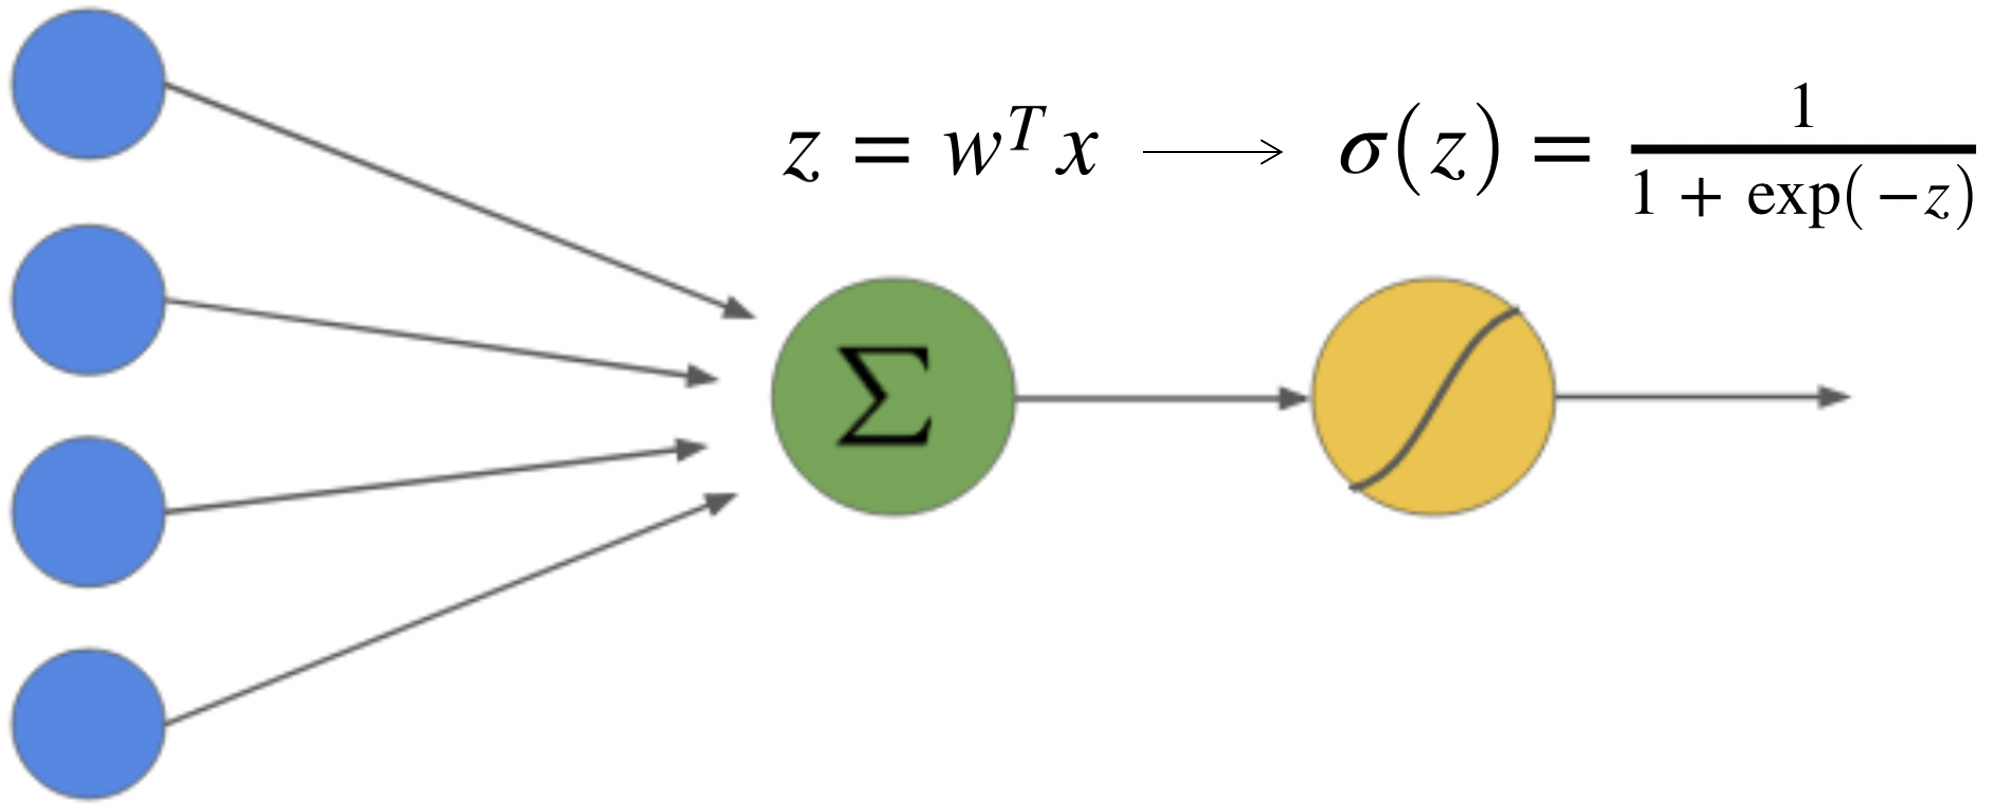

In [1]:
from IPython.display import Image
Image(filename = "/home/irekik/Downloads/image3.png", width = 600, height = 300)

<div>
<img src="attachment:image3.png" width="500"/>
</div>


#### logistic regression
$$ \hat{y} = \sigma(w^Tx) = \frac{1}{{1 + \textrm{exp}(-w^Tx)}}$$

Note that our output is still a real number. Now that it is bounded between $0$ and $1$, we can interpret the value of $\hat{y}$ as the **probability that y = 1**.

$$p(y = 1 |x, w) = \sigma(w^Tx)$$

## 2 -  Data analysis and visualization


$$\hat{y}_i = \sigma(w^Tx_i) $$
$$\hat{y}_i = \sigma(x_{i,1}w_1 + x_{i,2}w_2) \quad \textrm{where}\ \{x_1,x_2\} = \{\textrm{Mark 1, Mark 2}\}$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("User_Data.csv") 
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
# input
x = data.iloc[:, [2, 3]].values
  
# output
y = data.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [7]:
purchased_age = []
purchased_salary = []
non_purchased_age = []
non_purchased_salary = []
for i in range (len(y)):
    if y[i] == 1: 
        purchased_age.append(x[i,0])
        purchased_salary.append(x[i,1])
    else:
        non_purchased_age.append(x[i,0])
        non_purchased_salary.append(x[i,1])
        
means_age_purchased =  np.mean(purchased_age, axis=0)
print('means_age_purchased =', means_age_purchased)
stds_age_purchased = np.std(purchased_age, axis=0)
print('stds_age_purchased =' ,stds_age_purchased)

means_salary_purchased =  np.mean(purchased_salary, axis=0)
print('means_salary_purchased =', means_salary_purchased)
stds_salary_purchased = np.std(purchased_salary, axis=0)
print('stds_salary_purchased =' ,stds_salary_purchased)

means_age_non_purchased =  np.mean(non_purchased_age, axis=0)
print('means_age_non_purchased =', means_age_non_purchased)
stds_age_non_purchased = np.std(non_purchased_age, axis=0)
print('stds_age_non_purchased =', stds_age_non_purchased)

means_salary_non_purchased =  np.mean(non_purchased_salary, axis=0)
print('means_salary_non_purchased =' , means_salary_non_purchased)
stds_salary_non_purchased = np.std(non_purchased_salary, axis=0)
print('stds_salary_non_purchased =' , stds_salary_non_purchased)

means_age_purchased = 46.39160839160839
stds_age_purchased = 8.582006680946927
means_salary_purchased = 86272.72727272728
stds_salary_purchased = 41916.864409597874
means_age_non_purchased = 32.793774319066145
stds_age_non_purchased = 7.970292614059874
means_salary_non_purchased = 60544.74708171206
stds_salary_non_purchased = 24304.14733055277


Text(0.5, 0.98, 'Gaussian distribution for age ')

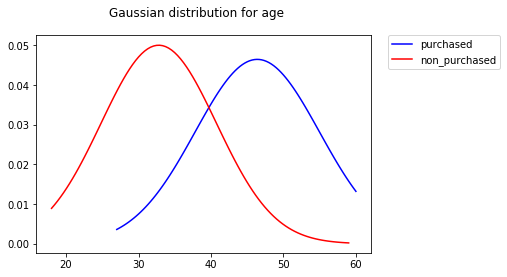

<Figure size 576x432 with 0 Axes>

In [8]:
import scipy.stats as stats
mu1 = means_age_purchased
sigma1 = stds_age_purchased

mu2 = means_age_non_purchased
sigma2 = stds_age_non_purchased

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

fig, ax = plt.subplots()
plt.figure(figsize=(8,6))
x1 = np.linspace(min(purchased_age), max(purchased_age), 100)
x2 = np.linspace(min(non_purchased_age), max(non_purchased_age), 100)

ax.plot(x1, gaussian(x1, mu1, sigma1), color = 'blue', label='purchased')
ax.plot(x2, gaussian(x2, mu2, sigma2), color = 'red',  label='non_purchased')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.suptitle("Gaussian distribution for age ")

Text(0.5, 0.98, 'Gaussian distribution for salary ')

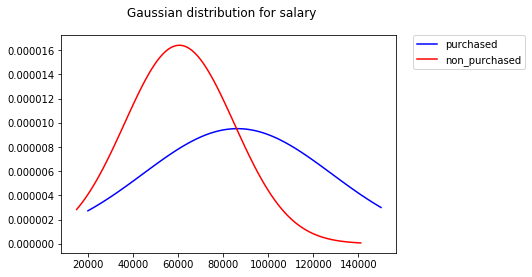

<Figure size 576x432 with 0 Axes>

In [9]:
mu3 = means_salary_purchased
sigma3 = stds_salary_purchased

mu4 = means_salary_non_purchased
sigma4 = stds_salary_non_purchased


fig, ax = plt.subplots()
plt.figure(figsize=(8,6))
x3 = np.linspace(min(purchased_salary), max(purchased_salary), 100)
x4 = np.linspace(min(non_purchased_salary), max(non_purchased_salary), 100)

ax.plot(x3, gaussian(x3, mu3, sigma3), color = 'blue', label='purchased')
ax.plot(x4, gaussian(x4, mu4, sigma4), color = 'red',  label='non_purchased')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.suptitle("Gaussian distribution for salary ")

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [12]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

## 3 - Model evaluation 
This is basically looking at how well your model did on predictions

### 3.1 Visualize CFM (confusion matrix) using a heatmap

Text(0.5, 257.44, 'Predicted label')

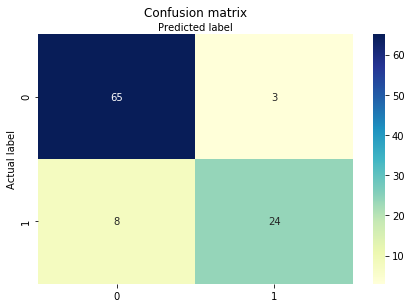

In [13]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[2.0766937696593093, 1.1102990998879994]


Text(0.5, 0, 'Importance')

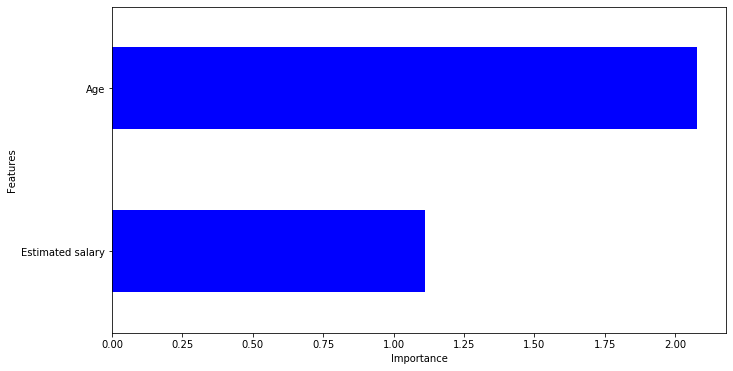

In [14]:
## interpreting the model coefficient
coeff = list(classifier.coef_[0])
print(coeff) 
features = pd.DataFrame()
features['Features'] = ['Age', 'Estimated salary']
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

### 3.2 CFM evaluation metrics : Accuracy and Precision

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
print ("Precision : ", precision_score(ytest, y_pred))

Accuracy :  0.89
Precision :  0.8888888888888888


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


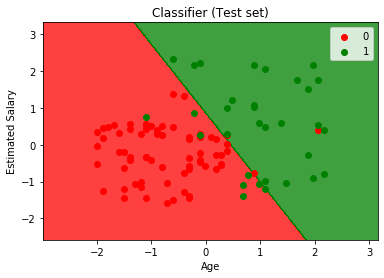

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 3.3 AUROC (Area Under the Receiver Operating Characteristics)
Plotting true positive rate against false positie rate. Shows tradeoff between sensitivity and specificity. 
(source : https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
#### AUC -  ( Area Under The Curve) - ROC (Receiver Operating Characteristics) Curve 
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between costumers which will purchase or no.

* The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

<img src='https://miro.medium.com/max/361/1*pk05QGzoWhCgRiiFbz-oKQ.png' width='300'  align="center">





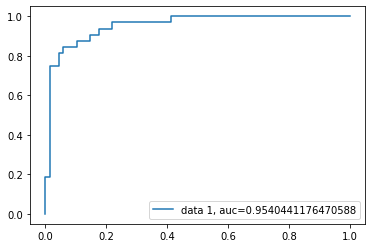

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = classifier.predict_proba(xtest)[:,1]
fpr, tpr, _ =  roc_curve(ytest,  y_pred_proba)
auc = roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()